In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
warnings.filterwarnings("ignore")

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


NameError: name 'warnings' is not defined

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [17]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
print(train.shape)

(1460, 81)


In [18]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### df.describe shows that 38 Columns are Numeric, hence the others are categorical according to algo, we need to check again though

In [19]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


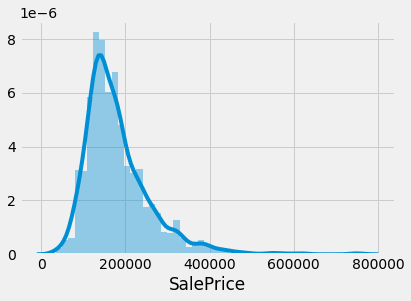

In [20]:
plt.style.use('fivethirtyeight')
sns.distplot(train.SalePrice)

### let's Transform this Sales price - We can use BoxCox Transformation to convert to normal distribtion

In [21]:
from fitter import Fitter
f = Fitter(train.SalePrice)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Fitted alpha distribution with error=2.5369494219501643e-11)
Fitted anglit distribution with error=4.4089330062929014e-10)


/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:422: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


Fitted arcsine distribution with error=6.004052836271086e-10)
Fitted argus distribution with error=5.204315816663266e-10)


/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/opt/conda/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Fitted beta distribution with error=4.7250770232924254e-11)


/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:708: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:712: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


Fitted betaprime distribution with error=2.8501598775456137e-11)
Fitted bradford distribution with error=3.696715190485751e-10)
SKIPPED burr distribution (taking more than 30 seconds)


/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:951: RuntimeWarning: overflow encountered in power
  return np.log(c) + np.log(d) + sc.xlogy(c - 1, x) + sc.xlog1py(-d-1, x**c)


Fitted burr12 distribution with error=6.116740817137073e-10)
Fitted cauchy distribution with error=6.686747335799632e-11)
Fitted chi distribution with error=6.857328482340217e-10)
Fitted chi2 distribution with error=8.602061055747797e-11)
Fitted cosine distribution with error=3.8472632623203273e-10)
Fitted crystalball distribution with error=3.951701068479159e-10)
Fitted dgamma distribution with error=5.3251488817894886e-11)
Fitted dweibull distribution with error=6.554645709415145e-11)


/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.05.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0333333333333332.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0555555555555554.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.083333333333333.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been give

/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.603783007544552.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.5971997170781602.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.4561664094649913.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.4388642403977765.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution

/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value -0.15097570720090814.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value -0.15953863259085996.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.17603387538083107.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value -0.04768112993362961.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang dist

/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00867311461175299.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00806023065214617.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.010126533506352172.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0037374364723712916.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang dist

/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.66549344226277.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.439353832099041.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.226630184814997.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 11.219140123550602.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution h

/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6030.94858255299.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4896.869567331674.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5800.181851777583.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5056.430815008887.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has

/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5180.695712168339.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5178.076611604119.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5183.222319713902.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5177.465821091126.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution ha

/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5181.846222611961.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5181.896714070892.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5181.85666452246.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5181.889576542899.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has

/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5181.8331936660525.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5181.829830018341.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5181.766257702646.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5181.739217767712.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution h

/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5182.008310667079.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5183.092359444252.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5184.067843252549.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5183.145673755811.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution ha

/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5328.141678199752.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5374.461547515024.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5368.316880225828.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5431.166823346999.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution ha

/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6032.576349762214.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5978.571207166415.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6042.044240079784.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6021.474591225187.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution ha

/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6825.063033913155.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6764.450276207627.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6898.083656171737.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6683.17211827983.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has

/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7786.091722600961.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8014.637165391616.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8098.321509154332.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7864.149169239303.
  RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution ha

Fitted erlang distribution with error=5.597339505602179e-10)
Fitted expon distribution with error=3.7769865449068784e-10)
Fitted exponnorm distribution with error=1.9277159193579923e-11)


/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1656: RuntimeWarning: overflow encountered in exp
  f = 1 + np.log(b) + sc.xlogy(b - 1.0, x) + xb - np.exp(xb)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2664: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


Fitted exponpow distribution with error=6.857328482340217e-10)


/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1608: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


KeyboardInterrupt: 

In [ ]:
# This Graph is to compare your graph against a Normal Distribution
from scipy import stats
fig = plt.figure()
ax1 = fig.add_subplot(211)
prob = stats.probplot(train.SalePrice, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

In [ ]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
Yt, gamma = stats.boxcox(train.SalePrice)
prob = stats.probplot(Yt, dist=stats.norm, plot=ax2)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

In [ ]:
## This shows that SalePrice is now Close to normal and can be used better- WE'll be using this whenever necessary
sns.distplot(Yt)

In [ ]:
!pip install dabl

In [ ]:
import dabl
dabl.plot(train, target_col = 'SalePrice')

In [ ]:
msno.matrix(train.sample(500))

In [ ]:
msno.heatmap(train)

### Things to Focus on EDA is Missing data adn outliers.